In [1]:
import numpy as np
import pandas as pd
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,1.916575,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,0.370941,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,1.449817,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-3.274733,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-0.644261,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0


In [3]:
dff = pd.read_csv("test.csv")
dff.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,-23.230884,-1.809757,12.380690,-4.101199,-60.760749,-22.957453,-1.964078,-0.631029,-4.306616,-4.694198,...,-200.759241,1.474824,-8.057325,asia,3.418412,-10.364264,-18.055341,-6.236096,-4.909211,47.679903
1,138.561415,1.107473,-19.781009,-17.584757,-76.922109,71.816830,-0.418432,1.403957,-5.367051,0.039857,...,-323.789253,5.539663,-1.958140,asia,-5.208792,-52.514599,-0.946514,-20.699992,-3.704683,-35.404859
2,-9.243047,-10.207303,-7.507803,3.152110,-14.915059,30.576213,-0.378178,2.606353,1.581679,4.802973,...,27.816461,-0.977431,10.324237,asia,7.939948,19.031967,7.961947,6.761312,-1.072949,36.075623
3,8.963713,17.580528,13.884170,-17.164185,-33.547539,19.288187,-1.219019,5.574611,-3.879657,2.693111,...,-374.983643,-2.631231,2.206816,asia,-8.234822,-14.077963,-11.476360,15.808888,6.361906,47.278303
4,27.431028,-6.232849,52.780835,-7.053903,5.679193,-29.618139,1.331833,4.425692,-4.213258,-0.398755,...,-352.113759,1.759678,-7.117473,asia,5.998549,-32.618465,-11.656808,-19.310773,-2.407052,-54.988928


In [4]:
df.shape

(40000, 101)

In [5]:
dff.shape

(10000, 100)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, x0 to y
dtypes: float64(94), int64(1), object(6)
memory usage: 30.8+ MB


In [7]:
dff.info

<bound method DataFrame.info of               x0         x1         x2         x3         x4         x5  \
0     -23.230884  -1.809757  12.380690  -4.101199 -60.760749 -22.957453   
1     138.561415   1.107473 -19.781009 -17.584757 -76.922109  71.816830   
2      -9.243047 -10.207303  -7.507803   3.152110 -14.915059  30.576213   
3       8.963713  17.580528  13.884170 -17.164185 -33.547539  19.288187   
4      27.431028  -6.232849  52.780835  -7.053903   5.679193 -29.618139   
...          ...        ...        ...        ...        ...        ...   
9995   74.274043 -26.900664  11.953376   3.639831 -19.904948  47.474039   
9996   27.264239  12.447430  37.394596  -4.238767  -9.073467  36.310843   
9997  -39.156408  -5.018108   6.463843  -3.805811 -40.402311  26.623165   
9998   -5.796416  -2.854645 -21.742994 -12.061882  70.614512  52.130494   
9999   33.687916 -12.202006  24.362589   4.388647   9.412722 -10.112018   

            x6        x7        x8        x9  ...         x90      

In [8]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
count,39986.000000,39990.000000,39994.000000,39990.000000,39994.000000,39990.000000,39993.000000,39987.000000,39994.000000,39993.000000,...,39993.000000,39998.000000,39994.000000,39989.000000,39993.000000,39985.000000,39993.000000,39995.000000,39987.000000,40000.000000
mean,8.259955,-3.249786,1.030666,-0.747566,0.283820,-1.773510,-0.000232,-0.016107,-0.651093,-0.014688,...,-14.274809,0.011390,0.003948,-0.050510,-0.007572,-0.629241,-1.986671,0.036482,1.486887,0.201175
std,38.374182,15.171131,24.732185,15.225730,42.240018,42.124100,1.065955,3.382644,2.947472,1.906496,...,154.038206,3.311041,8.763944,4.979690,19.238210,16.915222,14.375663,5.633052,36.926796,0.400884
min,-140.780478,-64.493908,-105.388182,-63.804916,-158.195975,-169.237259,-4.133490,-12.966970,-12.037625,-7.446200,...,-674.004008,-12.807938,-38.121111,-21.578977,-87.669573,-77.010252,-57.709983,-23.588876,-154.559512,0.000000
25%,-17.800204,-13.458580,-15.565461,-11.078276,-28.246509,-30.391354,-0.723098,-2.299081,-2.628856,-1.299759,...,-116.645845,-2.218739,-5.925508,-3.435180,-12.895717,-11.948902,-11.686033,-3.770599,-23.559519,0.000000
50%,8.354662,-3.386601,1.132995,-0.714888,0.292788,-1.753365,0.001105,-0.003556,-0.659223,-0.028170,...,-11.471306,-0.006726,0.009306,-0.037111,0.124945,-0.481374,-2.026059,0.041838,1.465346,0.000000
75%,33.829780,6.881661,17.677615,9.552404,28.719663,26.844781,0.715844,2.259972,1.322101,1.263469,...,90.101751,2.238996,5.909011,3.299108,12.988509,10.793171,7.611660,3.840100,26.548474,0.000000
max,177.399176,62.906822,99.394915,59.338352,179.342581,170.894497,5.311653,16.619445,14.994937,7.300186,...,603.911528,14.982369,35.785334,20.983463,78.785164,70.182932,60.481075,22.759016,143.126382,1.000000


In [9]:
dff.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99
count,10000.000000,9998.000000,9997.000000,9997.000000,9998.000000,9999.000000,9996.000000,10000.000000,9999.000000,9998.000000,...,9997.000000,9999.000000,9997.000000,9998.000000,9999.000000,9998.000000,9998.000000,9994.000000,9998.000000,9998.000000
mean,7.659723,-3.090298,1.111079,-0.738489,0.479230,-1.447082,0.007241,-0.007471,-0.663452,-0.029460,...,-0.085045,-12.553631,-0.029183,0.106188,0.042943,-0.052841,-0.516746,-1.980873,0.006856,1.366912
std,38.154705,15.250796,24.735211,15.361257,41.934791,41.382954,1.059882,3.353986,2.924507,1.875564,...,7.650146,153.770688,3.302254,8.755849,4.963094,19.370753,16.956265,14.389074,5.646734,36.847056
min,-146.942945,-63.335984,-96.450383,-65.740406,-159.472121,-160.162736,-3.971430,-12.138488,-11.529654,-7.123307,...,-29.543531,-650.932883,-11.116723,-30.962878,-21.107893,-72.418350,-68.747656,-56.592853,-22.510713,-140.735907
25%,-18.268008,-13.301540,-15.686880,-11.062302,-27.693495,-28.929959,-0.707804,-2.248168,-2.580388,-1.289821,...,-5.202499,-113.553256,-2.267247,-5.816339,-3.314055,-13.139888,-11.894004,-11.641541,-3.753639,-23.599386
50%,7.509680,-3.064799,1.764322,-0.634181,0.533755,-1.152902,0.007485,0.009257,-0.666028,-0.044106,...,-0.094181,-8.809392,-0.051298,0.118928,0.078457,-0.031201,-0.451612,-1.871513,-0.012661,1.135668
75%,33.186920,6.844091,17.980219,9.692347,28.755266,26.287108,0.704268,2.244817,1.281501,1.234191,...,5.057618,92.611044,2.218320,5.976669,3.445492,13.201257,10.896462,7.715663,3.780273,26.144243
max,143.801953,60.339810,90.310926,60.732554,158.498330,148.496327,4.298322,12.827708,10.722596,6.945239,...,28.197635,536.389169,13.169523,36.923263,18.922542,79.970819,60.918447,56.460670,20.832139,156.745312


In [10]:
# Finding correlation between variables
df.corr()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x94,x95,x96,x97,x98,x99,y
x0,1.000000,-0.216924,-0.159945,-0.148053,-0.256891,-0.080470,0.000727,-0.002743,0.112266,-0.003204,...,-0.305545,0.007720,-0.005131,0.002689,-0.129118,-0.139308,-0.072393,0.000610,-0.247857,-0.060938
x1,-0.216924,1.000000,-0.025842,-0.032080,-0.018458,0.083975,0.000477,0.009367,-0.118730,0.006592,...,-0.078450,0.004710,0.003828,-0.007244,0.034858,0.242884,-0.055239,-0.003894,0.022306,0.101217
x2,-0.159945,-0.025842,1.000000,-0.089540,-0.063347,0.001034,0.001934,0.001630,0.000117,-0.000518,...,-0.211187,-0.002526,0.009968,0.007225,-0.019335,-0.058106,0.157295,0.007496,0.029793,0.093200
x3,-0.148053,-0.032080,-0.089540,1.000000,0.012169,-0.006310,-0.004602,0.002840,-0.024033,0.000198,...,0.252543,-0.000726,0.005950,-0.007694,-0.018706,0.011238,0.043991,0.008407,-0.156664,-0.096704
x4,-0.256891,-0.018458,-0.063347,0.012169,1.000000,0.000199,0.000529,-0.002093,0.074596,0.001476,...,0.189670,-0.007492,0.006907,0.008572,0.035288,0.079489,0.114028,-0.001200,-0.105678,-0.009076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x96,-0.139308,0.242884,-0.058106,0.011238,0.079489,0.103554,0.000914,0.002126,-0.043888,0.001773,...,0.021356,0.001200,0.006970,-0.002501,0.028986,1.000000,-0.063912,-0.008661,0.138702,-0.091515
x97,-0.072393,-0.055239,0.157295,0.043991,0.114028,-0.017630,0.004733,-0.001092,0.023410,0.001974,...,0.100657,0.001069,-0.003464,-0.001710,-0.019229,-0.063912,1.000000,0.004627,0.051630,0.184344
x98,0.000610,-0.003894,0.007496,0.008407,-0.001200,-0.004064,-0.003090,0.003879,-0.002299,-0.004808,...,-0.001179,-0.000450,0.001421,0.000540,0.002204,-0.008661,0.004627,1.000000,0.001540,0.012121
x99,-0.247857,0.022306,0.029793,-0.156664,-0.105678,0.066933,0.000819,-0.009845,-0.059397,-0.003486,...,-0.120751,-0.004933,-0.001487,-0.004542,-0.009941,0.138702,0.051630,0.001540,1.000000,0.098397


In [11]:
dff.corr()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99
x0,1.000000,-0.216771,-0.142561,-0.143322,-0.265702,-0.084977,-0.005843,-0.004046,0.116976,-0.016822,...,-0.001612,-0.296042,-0.019907,0.001491,0.005823,-0.108086,-0.139258,-0.071173,-0.000082,-0.252779
x1,-0.216771,1.000000,-0.031682,-0.038415,-0.019638,0.090633,-0.014365,0.009866,-0.113398,-0.001937,...,-0.017664,-0.080514,0.019751,-0.007361,-0.007741,0.030479,0.236660,-0.049075,-0.001610,0.042897
x2,-0.142561,-0.031682,1.000000,-0.106664,-0.056909,0.001929,0.005132,-0.011798,-0.011204,0.002644,...,-0.015727,-0.214911,0.005961,-0.000474,0.032882,-0.001061,-0.048874,0.160567,0.012774,0.017922
x3,-0.143322,-0.038415,-0.106664,1.000000,0.024021,-0.013057,-0.002155,-0.014840,-0.019786,-0.002277,...,0.007828,0.259125,-0.017561,0.014222,0.011329,-0.030473,0.012383,0.043776,-0.008411,-0.150562
x4,-0.265702,-0.019638,-0.056909,0.024021,1.000000,0.015118,-0.007611,-0.005033,0.055821,0.014872,...,-0.004736,0.189355,0.007907,0.010772,-0.003814,0.022618,0.077622,0.113334,-0.014298,-0.102181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x95,-0.108086,0.030479,-0.001061,-0.030473,0.022618,-0.078027,-0.014500,-0.013163,0.194980,0.017505,...,-0.007398,0.363623,-0.006315,-0.005260,0.012669,1.000000,0.009642,-0.001028,-0.022097,-0.010645
x96,-0.139258,0.236660,-0.048874,0.012383,0.077622,0.118018,-0.003047,0.021749,-0.039176,-0.007630,...,-0.006375,0.030277,0.007300,-0.000701,-0.014752,0.009642,1.000000,-0.056768,-0.009920,0.141064
x97,-0.071173,-0.049075,0.160567,0.043776,0.113334,-0.022149,0.004475,0.004635,0.007944,0.009084,...,0.001273,0.099527,-0.012546,0.005166,0.013981,-0.001028,-0.056768,1.000000,-0.007584,0.047531
x98,-0.000082,-0.001610,0.012774,-0.008411,-0.014298,0.002593,-0.025502,-0.006535,0.001997,-0.000580,...,0.015238,-0.014282,0.002381,-0.014816,0.011675,-0.022097,-0.009920,-0.007584,1.000000,-0.007399


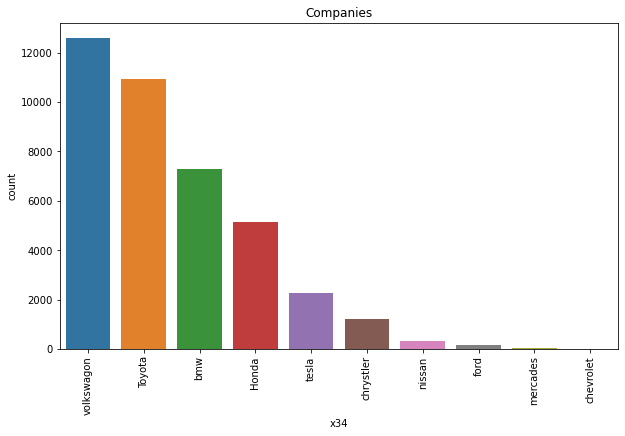

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df['x34'],order = list(df['x34'].value_counts().keys()))
plt.xlabel('x34')
plt.xticks(rotation = 90)
plt.title('Companies')
plt.show()

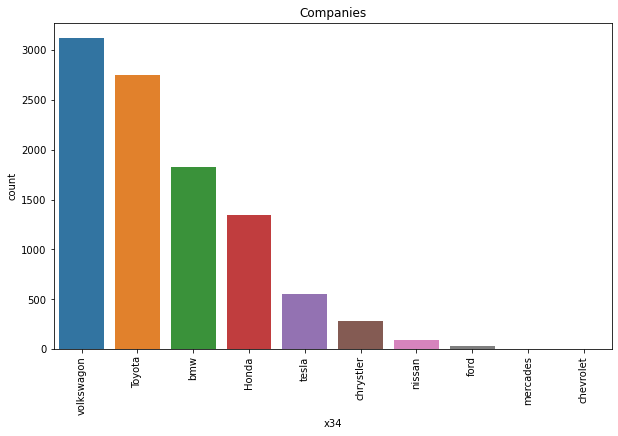

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(dff['x34'],order = list(dff['x34'].value_counts().keys()))
plt.xlabel('x34')
plt.xticks(rotation = 90)
plt.title('Companies')
plt.show()

In [14]:
df['x41'].value_counts()

$-511.36     4
$-370.55     4
$-100.95     4
$680.85      4
$-369.55     4
            ..
$-1336.48    1
$-143.19     1
$-372.51     1
$85.96       1
$-241.83     1
Name: x41, Length: 37832, dtype: int64

In [15]:
dff['x41'].value_counts()

$-930.36     3
$-369.26     3
$-452.97     2
$298.84      2
$-1265.71    2
            ..
$407.88      1
$-1144.14    1
$403.13      1
$372.64      1
$315.41      1
Name: x41, Length: 9861, dtype: int64

In [16]:
# removing extra characters in x6 feature

x41_mod = []

# replacing x6 null values with 0.0
df['x41'].fillna('0.0',inplace = True) 

for i in df['x41'].values:
  x41_mod.append(float(re.sub('[^0-9.]+', '',str(i))))

df['x41_mod'] = x41_mod
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x92,x93,x94,x95,x96,x97,x98,x99,y,x41_mod
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,5.240820,euorpe,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170,0,54.10
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,-3.794542,asia,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898,0,229.32
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,12.470532,asia,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236,0,243.68
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,3.484450,asia,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681,0,126.15
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,4.082783,asia,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881,0,877.39


In [17]:
# removing extra characters in x6 feature

xx41_mod = []

# replacing x6 null values with 0.0
dff['x41'].fillna('0.0',inplace = True) 

for i in dff['x41'].values:
  xx41_mod.append(float(re.sub('[^0-9.]+', '',str(i))))

dff['x41_mod'] = xx41_mod
dff.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x41_mod
0,-23.230884,-1.809757,12.380690,-4.101199,-60.760749,-22.957453,-1.964078,-0.631029,-4.306616,-4.694198,...,1.474824,-8.057325,asia,3.418412,-10.364264,-18.055341,-6.236096,-4.909211,47.679903,1073.61
1,138.561415,1.107473,-19.781009,-17.584757,-76.922109,71.816830,-0.418432,1.403957,-5.367051,0.039857,...,5.539663,-1.958140,asia,-5.208792,-52.514599,-0.946514,-20.699992,-3.704683,-35.404859,1775.77
2,-9.243047,-10.207303,-7.507803,3.152110,-14.915059,30.576213,-0.378178,2.606353,1.581679,4.802973,...,-0.977431,10.324237,asia,7.939948,19.031967,7.961947,6.761312,-1.072949,36.075623,697.23
3,8.963713,17.580528,13.884170,-17.164185,-33.547539,19.288187,-1.219019,5.574611,-3.879657,2.693111,...,-2.631231,2.206816,asia,-8.234822,-14.077963,-11.476360,15.808888,6.361906,47.278303,134.48
4,27.431028,-6.232849,52.780835,-7.053903,5.679193,-29.618139,1.331833,4.425692,-4.213258,-0.398755,...,1.759678,-7.117473,asia,5.998549,-32.618465,-11.656808,-19.310773,-2.407052,-54.988928,1195.16


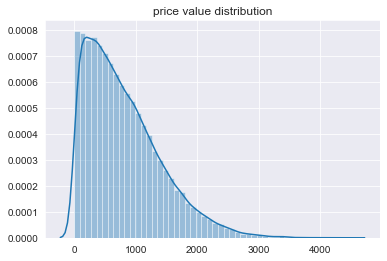

In [18]:
sns.set_style('darkgrid')
sns.distplot(x41_mod)
plt.title('price value distribution')
plt.show()

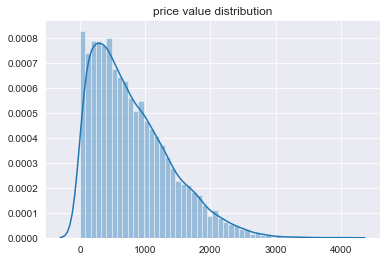

In [19]:
sns.set_style('darkgrid')
sns.distplot(xx41_mod)
plt.title('price value distribution')
plt.show()

In [20]:
df[df['x41_mod']==0.0]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x92,x93,x94,x95,x96,x97,x98,x99,y,x41_mod
868,68.690183,-30.029298,23.734175,-23.183281,2.094347,-89.010251,-1.793634,6.451417,2.580809,-2.910000,...,3.051883,asia,0.950914,-16.595339,-10.104427,20.942838,0.174214,18.471506,0,0.0
2553,-44.091636,-6.165453,-40.757744,10.958225,44.373523,16.260931,0.281182,6.286608,-2.315827,0.173560,...,3.831394,asia,4.841758,16.841690,2.401921,-14.768524,0.818978,12.035822,0,0.0
5616,8.030354,2.220194,-18.627778,-17.444671,-19.123667,22.139930,-0.908606,1.011864,1.214058,-0.490258,...,4.614639,asia,-2.483512,9.009414,9.748500,5.221146,3.087103,65.723166,0,0.0
21612,27.675527,-29.862225,23.946247,-9.362151,-5.250425,17.633637,-0.788668,5.767178,-1.300985,-0.377331,...,-6.787356,asia,-0.431427,22.245419,10.436570,-15.679026,-6.349328,1.741417,0,0.0
36829,-45.485230,19.207519,-24.252817,-6.250478,47.581327,-50.426063,2.089864,3.666781,-1.577257,1.256274,...,7.606392,asia,3.404581,10.579018,3.158185,4.302143,1.656366,36.195961,1,0.0


In [21]:
dff[dff['x41_mod']==0.0]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x41_mod
2926,5.51857,12.232957,-46.144756,-4.057285,-49.111348,-2.699089,2.660429,-6.156805,-1.818505,4.004298,...,3.898756,7.126437,asia,4.819619,12.752561,-16.763141,3.402514,-5.783248,65.030532,0.0


In [22]:
df['x35'].value_counts()

wed          14834
thurday      13359
wednesday     5891
thur          4374
tuesday        929
friday         526
monday          56
fri             21
Name: x35, dtype: int64

In [23]:
dff['x35'].value_counts()

wed          3704
thurday      3301
wednesday    1525
thur         1126
tuesday       183
friday        132
monday         18
fri             8
Name: x35, dtype: int64

In [24]:
df['x93'].value_counts()

asia       35409
america     3136
euorpe      1448
Name: x93, dtype: int64

In [25]:
dff['x93'].value_counts()

asia       8875
america     783
euorpe      341
Name: x93, dtype: int64

In [26]:
np.mean(df['x41_mod'].values)

798.2871887500002

In [27]:
np.mean(dff['x41_mod'].values)

793.259792

In [28]:
# filling 0.0 in feature x6 with mean based on categorical values x4,x7,x8 

for i in df.index[df['x41_mod']==0.0].tolist():
  x34_mod = df['x34'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x41_mod'][(df['x34']==x34_mod) & (df['x68']==x68_mod) & (df['x93']==x93_mod)].values)
  df['x41_mod'].loc[i]=m

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
for i in dff.index[dff['x41_mod']==0.0].tolist():
  x34_mod = dff['x34'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x41_mod'][(dff['x34']==x34_mod) & (dff['x68']==x68_mod) & (dff['x93']==x93_mod)].values)
  dff['x41_mod'].loc[i]=m

In [30]:
df[df['x0'].isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x92,x93,x94,x95,x96,x97,x98,x99,y,x41_mod
1195,NaN,-2.702594,37.673761,7.333685,-3.318627,-9.658900,0.414157,4.990782,2.927111,1.396972,...,-4.185804,asia,-2.706392,27.180089,-7.358192,5.535753,-0.843300,-30.546821,0,707.56
1428,NaN,-28.856770,41.988082,-13.307036,-65.929444,80.395740,0.705866,1.982853,-1.346558,0.324590,...,5.861804,asia,8.378748,-15.983737,-25.761752,8.563527,0.624231,50.482619,0,295.31
1839,NaN,-35.929175,-1.295219,-34.928655,15.960356,53.514538,1.359531,5.215772,2.084257,-2.274224,...,-0.061104,asia,-2.950850,16.625950,-8.203029,-14.417586,-0.101422,4.447113,0,250.25
8754,NaN,-10.647534,9.286525,-10.621704,6.681295,-21.655082,0.109501,-1.419211,-1.487229,0.089740,...,-13.012034,asia,2.037873,-13.515812,-2.114839,-16.003251,7.173389,-1.946998,0,300.59
13397,NaN,15.418197,-23.060957,15.202320,17.011557,69.286920,-0.480090,4.065742,-4.593787,1.611231,...,0.107346,asia,-0.202962,19.477433,-10.092004,-28.594556,-1.870912,-80.659665,0,683.27
14503,NaN,-13.195711,25.271337,-4.911765,-10.060719,-17.361305,-1.048995,-0.362400,4.393603,-0.866052,...,5.749443,asia,6.672785,24.731115,-7.796898,8.362235,-4.208895,10.943521,1,744.25
15000,NaN,3.609275,-11.480132,-26.189113,8.273626,-94.629137,1.274712,6.762200,6.296988,-2.020278,...,-10.603668,asia,5.146403,-15.301467,-1.495881,-10.653455,-6.290346,60.539416,0,895.08
16629,NaN,-13.723370,46.631145,7.380630,-97.969593,-9.039622,-0.872665,2.819799,-4.779000,0.161948,...,19.294277,asia,0.973583,-22.718804,-5.910861,-17.820993,-1.921860,43.259200,0,176.65
20956,NaN,4.097720,4.057532,29.003385,-22.096924,6.099154,0.458052,5.143230,1.555886,-0.783773,...,-1.389890,asia,-7.492228,-6.556002,-15.575208,19.262256,2.887064,-28.413119,0,957.97
21404,NaN,-0.317105,-31.824669,8.962038,25.582271,-10.507094,-0.307429,-0.851135,-3.737701,-0.917274,...,15.657270,asia,6.643963,7.338547,-1.586049,2.990573,2.529832,-60.547952,0,826.65


In [31]:
dff[dff['x0'].isnull()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x41_mod


In [32]:
df.index[df['x0'].isnull()].tolist()

[1195,
 1428,
 1839,
 8754,
 13397,
 14503,
 15000,
 16629,
 20956,
 21404,
 29255,
 32985,
 36902,
 37146]

In [33]:
dff.index[dff['x2'].isnull()].tolist()

[996, 1124, 5189]

In [34]:
# filling null values in feature x0 with mean based on categorical features x4,x5,x7,x8 

for i in df.index[df['x0'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]
  
  m = np.mean(df['x0'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x0'].loc[i]=m

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
df['x0'].loc[26]

18.849562670015512

In [36]:
# filling null values in feature x with mean based on categorical features x4,x5,x7,x8 

for i in df.index[df['x1'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x_mod = df['x93'].loc[i]

  m = np.mean(df['x1'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x1'].loc[i]=m

In [37]:
for i in df.index[df['x2'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x2'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x2'].loc[i]=m

In [38]:
for i in df.index[df['x3'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x3'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x3'].loc[i]=m

In [39]:
for i in df.index[df['x4'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x4'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x4'].loc[i]=m

In [40]:
for i in df.index[df['x5'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x5'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x5'].loc[i]=m

In [41]:
for i in df.index[df['x6'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x6'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x6'].loc[i]=m

In [42]:
for i in df.index[df['x7'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x7'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x7'].loc[i]=m

In [43]:
for i in df.index[df['x8'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x8'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x8'].loc[i]=m

In [44]:
for i in df.index[df['x9'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x9'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x9'].loc[i]=m

In [45]:
for i in df.index[df['x10'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x10'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x10'].loc[i]=m

In [46]:
for i in df.index[df['x11'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x11'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x11'].loc[i]=m

In [47]:
for i in df.index[df['x12'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x12'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x12'].loc[i]=m

In [48]:
for i in df.index[df['x13'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x13'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x13'].loc[i]=m

In [49]:
for i in df.index[df['x14'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x14'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x14'].loc[i]=m

In [50]:
for i in df.index[df['x15'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x15'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x15'].loc[i]=m

In [51]:
for i in df.index[df['x16'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x16'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x16'].loc[i]=m

In [52]:
for i in df.index[df['x17'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x17'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x17'].loc[i]=m

In [53]:
for i in df.index[df['x18'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x18'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x18'].loc[i]=m

In [54]:
for i in df.index[df['x19'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x19'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x19'].loc[i]=m

In [55]:
for i in df.index[df['x20'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x20'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x20'].loc[i]=m

In [56]:
for i in df.index[df['x21'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x21'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x21'].loc[i]=m

In [57]:
for i in df.index[df['x22'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x22'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x22'].loc[i]=m

In [58]:
for i in df.index[df['x23'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x23'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x23'].loc[i]=m

In [59]:
for i in df.index[df['x24'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x24'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x24'].loc[i]=m

In [60]:
for i in df.index[df['x25'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x25'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x25'].loc[i]=m

In [61]:
for i in df.index[df['x26'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x26'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x26'].loc[i]=m

In [62]:
for i in df.index[df['x27'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x27'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x27'].loc[i]=m

In [63]:
for i in df.index[df['x28'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x28'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x28'].loc[i]=m

In [64]:
for i in df.index[df['x29'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x29'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x29'].loc[i]=m

In [65]:
for i in df.index[df['x30'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x30'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x30'].loc[i]=m

In [66]:
for i in df.index[df['x31'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x31'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x31'].loc[i]=m

In [67]:
for i in df.index[df['x32'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x32'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x32'].loc[i]=m

In [68]:
for i in df.index[df['x33'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x33'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x33'].loc[i]=m

In [69]:
for i in df.index[df['x36'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x36'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x36'].loc[i]=m

In [70]:
for i in df.index[df['x37'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x37'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x37'].loc[i]=m

In [71]:
for i in df.index[df['x38'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x38'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x38'].loc[i]=m

In [72]:
for i in df.index[df['x39'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x39'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x39'].loc[i]=m

In [73]:
for i in df.index[df['x40'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x40'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x40'].loc[i]=m

In [74]:
for i in df.index[df['x41'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x41'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x41'].loc[i]=m

In [75]:
for i in df.index[df['x42'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x42'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x42'].loc[i]=m

In [76]:
for i in df.index[df['x43'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x43'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x43'].loc[i]=m

In [77]:
for i in df.index[df['x44'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x44'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x44'].loc[i]=m

In [78]:
for i in df.index[df['x46'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x46'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x46'].loc[i]=m

In [79]:
for i in df.index[df['x47'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x47'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x47'].loc[i]=m

In [80]:
for i in df.index[df['x49'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x49'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x49'].loc[i]=m

In [81]:
for i in df.index[df['x48'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x48'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x48'].loc[i]=m

In [82]:
for i in df.index[df['x50'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x50'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x50'].loc[i]=m

In [83]:
for i in df.index[df['x51'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x51'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x51'].loc[i]=m

In [84]:
for i in df.index[df['x52'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x52'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x52'].loc[i]=m

In [85]:
for i in df.index[df['x53'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x53'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x53'].loc[i]=m

In [86]:
for i in df.index[df['x54'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x54'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x54'].loc[i]=m

In [87]:
for i in df.index[df['x55'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x55'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x55'].loc[i]=m

In [88]:
for i in df.index[df['x56'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x56'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x56'].loc[i]=m

In [89]:
for i in df.index[df['x57'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x57'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x57'].loc[i]=m

In [90]:
for i in df.index[df['x58'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x58'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x58'].loc[i]=m

In [91]:
for i in df.index[df['x59'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x59'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x59'].loc[i]=m

In [92]:
for i in df.index[df['x60'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x60'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x60'].loc[i]=m

In [93]:
for i in df.index[df['x61'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x61'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x61'].loc[i]=m

In [94]:
for i in df.index[df['x62'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x62'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x62'].loc[i]=m

In [95]:
for i in df.index[df['x63'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x63'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x63'].loc[i]=m

In [96]:
for i in df.index[df['x64'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x64'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x64'].loc[i]=m

In [97]:
for i in df.index[df['x65'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x65'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x65'].loc[i]=m

In [98]:
for i in df.index[df['x66'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x66'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x66'].loc[i]=m

In [99]:
for i in df.index[df['x67'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x67'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x67'].loc[i]=m

In [100]:
for i in df.index[df['x69'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x69'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x69'].loc[i]=m

In [101]:
for i in df.index[df['x70'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x70'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x70'].loc[i]=m

In [102]:
for i in df.index[df['x71'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x71'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x71'].loc[i]=m

In [103]:
for i in df.index[df['x72'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x72'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x72'].loc[i]=m

In [104]:
for i in df.index[df['x73'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x73'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x73'].loc[i]=m

In [105]:
for i in df.index[df['x74'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x74'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x74'].loc[i]=m

In [106]:
for i in df.index[df['x75'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x75'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x75'].loc[i]=m

In [107]:
for i in df.index[df['x76'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x76'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x76'].loc[i]=m

In [108]:
for i in df.index[df['x77'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x77'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x77'].loc[i]=m

In [109]:
for i in df.index[df['x78'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x78'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x78'].loc[i]=m

In [110]:
for i in df.index[df['x79'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x79'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x79'].loc[i]=m

In [111]:
for i in df.index[df['x80'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x80'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x80'].loc[i]=m

In [112]:
for i in df.index[df['x81'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x81'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x81'].loc[i]=m

In [113]:
for i in df.index[df['x82'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x82'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x82'].loc[i]=m

In [114]:
for i in df.index[df['x83'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x83'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x83'].loc[i]=m

In [115]:
for i in df.index[df['x84'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x84'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x84'].loc[i]=m

In [116]:
for i in df.index[df['x85'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x85'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x85'].loc[i]=m

In [117]:
for i in df.index[df['x86'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x86'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x86'].loc[i]=m

In [118]:
for i in df.index[df['x87'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x87'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x87'].loc[i]=m

In [119]:
for i in df.index[df['x88'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x88'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x88'].loc[i]=m

In [120]:
for i in df.index[df['x89'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x89'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x89'].loc[i]=m

In [121]:
for i in df.index[df['x90'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x90'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x90'].loc[i]=m

In [122]:
for i in df.index[df['x91'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x91'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x91'].loc[i]=m

In [123]:
for i in df.index[df['x92'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x92'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x92'].loc[i]=m

In [124]:
for i in df.index[df['x94'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x94'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x94'].loc[i]=m

In [125]:
for i in df.index[df['x95'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x95'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x95'].loc[i]=m

In [126]:
for i in df.index[df['x96'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x96'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x96'].loc[i]=m

In [127]:
for i in df.index[df['x97'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x97'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x97'].loc[i]=m

In [128]:
for i in df.index[df['x98'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x98'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x98'].loc[i]=m

In [129]:
for i in df.index[df['x99'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['x99'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['x99'].loc[i]=m

In [130]:
for i in df.index[df['y'].isnull()].tolist():
  x34_mod = df['x34'].loc[i]
  x35_mod = df['x35'].loc[i]
  x68_mod = df['x68'].loc[i]
  x93_mod = df['x93'].loc[i]

  m = np.mean(df['y'][(df['x34']==x34_mod) |(df['x35']==x35_mod) | (df['x68']==x68_mod) | (df['x93']==x93_mod)])
  df['y'].loc[i]=m

In [131]:
for i in dff.index[dff['x0'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x0'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x0'].loc[i]=m

In [132]:
for i in dff.index[dff['x1'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x1'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x1'].loc[i]=m

In [133]:
for i in dff.index[dff['x2'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x2'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x2'].loc[i]=m

In [134]:
for i in dff.index[dff['x3'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x3'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x3'].loc[i]=m

In [135]:
for i in dff.index[dff['x4'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x4'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x4'].loc[i]=m

In [136]:
for i in dff.index[dff['x5'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x5'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x5'].loc[i]=m

In [137]:
for i in dff.index[dff['x6'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x6'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x6'].loc[i]=m

In [138]:
for i in dff.index[dff['x7'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x7'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x7'].loc[i]=m

In [139]:
for i in dff.index[dff['x8'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x8'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x8'].loc[i]=m

In [140]:
for i in dff.index[dff['x9'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x9'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x9'].loc[i]=m

In [141]:
for i in dff.index[dff['x10'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x10'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x10'].loc[i]=m

In [142]:
for i in dff.index[dff['x11'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x11'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x11'].loc[i]=m

In [143]:
for i in dff.index[dff['x12'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x12'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x21'].loc[i]=m

In [144]:
for i in dff.index[dff['x13'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x13'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x13'].loc[i]=m

In [145]:
for i in dff.index[dff['x14'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x14'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x14'].loc[i]=m

In [146]:
for i in dff.index[dff['x15'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x15'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x15'].loc[i]=m

In [147]:
for i in dff.index[dff['x16'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x16'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x16'].loc[i]=m

In [148]:
for i in dff.index[dff['x17'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x17'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x17'].loc[i]=m

In [149]:
for i in dff.index[dff['x18'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x18'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x18'].loc[i]=m

In [150]:
for i in dff.index[dff['x19'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x19'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x19'].loc[i]=m

In [151]:
for i in dff.index[dff['x20'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x20'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x20'].loc[i]=m

In [152]:
for i in dff.index[dff['x21'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x21'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x21'].loc[i]=m

In [153]:
for i in dff.index[dff['x22'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x22'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x22'].loc[i]=m

In [154]:
for i in dff.index[dff['x23'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x23'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x23'].loc[i]=m

In [155]:
for i in dff.index[dff['x24'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x24'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x24'].loc[i]=m

In [156]:
for i in dff.index[dff['x25'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x25'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x25'].loc[i]=m

In [157]:
for i in dff.index[dff['x26'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x26'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x26'].loc[i]=m

In [158]:
for i in dff.index[dff['x27'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x27'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x27'].loc[i]=m

In [159]:
for i in dff.index[dff['x28'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x28'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x28'].loc[i]=m

In [160]:
for i in dff.index[dff['x29'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x29'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x29'].loc[i]=m

In [161]:
for i in dff.index[dff['x30'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x30'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x30'].loc[i]=m

In [162]:
for i in dff.index[dff['x31'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x31'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x31'].loc[i]=m

In [163]:
for i in dff.index[dff['x32'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x32'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x32'].loc[i]=m

In [164]:
for i in dff.index[dff['x33'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x33'][(dff['x33']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x33'].loc[i]=m

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [165]:
for i in dff.index[dff['x36'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x36'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x36'].loc[i]=m

In [166]:
for i in dff.index[dff['x37'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x37'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x37'].loc[i]=m

In [167]:
for i in dff.index[dff['x38'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x38'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x38'].loc[i]=m

In [168]:
for i in dff.index[dff['x39'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x39'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x39'].loc[i]=m

In [169]:
for i in dff.index[dff['x40'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x40'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x40'].loc[i]=m

In [170]:
for i in dff.index[dff['x52'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x52'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x52'].loc[i]=m

In [171]:
for i in dff.index[dff['x51'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x51'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x51'].loc[i]=m

In [172]:
for i in dff.index[dff['x41'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x41'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x41'].loc[i]=m

In [173]:
for i in dff.index[dff['x42'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x42'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x42'].loc[i]=m

In [174]:
for i in dff.index[dff['x43'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x43'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x43'].loc[i]=m

In [175]:
for i in dff.index[dff['x44'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x44'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x44'].loc[i]=m

In [176]:
for i in dff.index[dff['x46'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x46'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x46'].loc[i]=m

In [177]:
for i in dff.index[dff['x47'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x47'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x47'].loc[i]=m

In [178]:
for i in dff.index[dff['x48'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x48'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x48'].loc[i]=m

In [179]:
for i in dff.index[dff['x49'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x49'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x49'].loc[i]=m

In [180]:
for i in dff.index[dff['x59'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x59'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x59'].loc[i]=m

In [181]:
for i in dff.index[dff['x50'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x50'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x50'].loc[i]=m

In [182]:
for i in dff.index[dff['x53'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x53'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x53'].loc[i]=m

In [183]:
for i in dff.index[dff['x54'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x54'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x54'].loc[i]=m

In [184]:
for i in dff.index[dff['x55'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x55'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x55'].loc[i]=m

In [185]:
for i in dff.index[dff['x56'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x56'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x56'].loc[i]=m

In [186]:
for i in dff.index[dff['x57'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x57'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x57'].loc[i]=m

In [187]:
for i in dff.index[dff['x58'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x58'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x58'].loc[i]=m

In [188]:
for i in dff.index[dff['x60'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x60'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x60'].loc[i]=m

In [189]:
for i in dff.index[dff['x61'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x61'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x61'].loc[i]=m

In [190]:
for i in dff.index[dff['x62'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x62'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x62'].loc[i]=m

In [191]:
for i in dff.index[dff['x63'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x63'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x63'].loc[i]=m

In [192]:
for i in dff.index[dff['x64'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x64'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x64'].loc[i]=m

In [193]:
for i in dff.index[dff['x65'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x65'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x65'].loc[i]=m

In [194]:
for i in dff.index[dff['x66'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x66'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x66'].loc[i]=m

In [195]:
for i in dff.index[dff['x67'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x67'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x67'].loc[i]=m

In [196]:
for i in dff.index[dff['x69'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x69'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x69'].loc[i]=m

In [197]:
for i in dff.index[dff['x69'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x6'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x6'].loc[i]=m

In [198]:
for i in dff.index[dff['x70'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x70'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x70'].loc[i]=m

In [199]:
for i in dff.index[dff['x71'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x71'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x71'].loc[i]=m

In [200]:
for i in dff.index[dff['x72'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x72'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x72'].loc[i]=m

In [201]:
for i in dff.index[dff['x73'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x73'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x73'].loc[i]=m

In [202]:
for i in dff.index[dff['x74'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x74'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x74'].loc[i]=m

In [203]:
for i in dff.index[dff['x75'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x75'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x75'].loc[i]=m

In [204]:
for i in dff.index[dff['x76'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x76'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x76'].loc[i]=m

In [205]:
for i in dff.index[dff['x77'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x77'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x77'].loc[i]=m

In [206]:
for i in dff.index[dff['x78'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x78'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x78'].loc[i]=m

In [207]:
for i in dff.index[dff['x79'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x79'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x79'].loc[i]=m

In [208]:
for i in dff.index[dff['x80'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x80'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x80'].loc[i]=m

In [209]:
for i in dff.index[dff['x81'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x81'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x81'].loc[i]=m

In [210]:
for i in dff.index[dff['x82'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x82'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x82'].loc[i]=m

In [211]:
for i in dff.index[dff['x83'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x83'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x83'].loc[i]=m

In [212]:
for i in dff.index[dff['x84'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x84'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x84'].loc[i]=m

In [213]:
for i in dff.index[dff['x85'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x85'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x85'].loc[i]=m

In [214]:
for i in dff.index[dff['x86'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x86'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x86'].loc[i]=m

In [215]:
for i in dff.index[dff['x87'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x87'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x87'].loc[i]=m

In [216]:
for i in dff.index[dff['x88'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x88'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x88'].loc[i]=m

In [217]:
for i in dff.index[dff['x89'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x89'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x89'].loc[i]=m

In [218]:
for i in dff.index[dff['x90'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x90'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x90'].loc[i]=m

In [219]:
for i in dff.index[dff['x91'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x91'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x91'].loc[i]=m

In [220]:
for i in dff.index[dff['x92'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x92'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x92'].loc[i]=m

In [221]:
for i in dff.index[dff['x94'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x94'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x94'].loc[i]=m

In [222]:
for i in dff.index[dff['x95'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x95'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x95'].loc[i]=m

In [223]:
for i in dff.index[dff['x96'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x96'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x96'].loc[i]=m

In [224]:
for i in dff.index[dff['x97'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x97'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x97'].loc[i]=m

In [225]:
for i in dff.index[dff['x98'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x98'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x98'].loc[i]=m

In [226]:
for i in dff.index[dff['x99'].isnull()].tolist():
  x34_mod = dff['x34'].loc[i]
  x35_mod = dff['x35'].loc[i]
  x68_mod = dff['x68'].loc[i]
  x93_mod = dff['x93'].loc[i]

  m = np.mean(dff['x99'][(dff['x34']==x34_mod) |(dff['x35']==x35_mod) | (dff['x68']==x68_mod) | (dff['x93']==x93_mod)])
  dff['x99'].loc[i]=m

In [227]:
final_x = df[['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x36','x37','x38','x39','x40','x43','x41_mod','x42','x43','x44','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','x56','x57','x58','x59','x60','x61','x62','x63','x64','x65','x66','x67','x69','x70','x71','x72','x73','x74','x75','x76','x77','x78','x79','x80','x81','x82','x83','x84','x85','x86','x87','x88','x89','x90','x91','x92','x94','x95','x96','x97','x98','x99']]
final_y = df['y']
final_x.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99
0,10.142889,-15.675620,3.583176,-22.397489,27.221894,-34.110924,-0.072829,-0.544444,0.997601,-2.691778,...,-10.945135,-151.134483,1.916575,5.240820,2.431170,0.454074,-18.572032,-14.291524,0.178579,18.110170
1,-52.214630,5.847135,-10.902843,-14.132351,20.588574,36.107322,0.115023,0.276093,-0.699168,-0.972708,...,-0.620432,-58.955871,0.370941,-3.794542,2.592326,31.921833,3.317139,10.037003,-1.930870,-3.486898
2,67.718500,2.064334,12.394186,-18.667102,47.465504,-50.373658,0.253707,1.068968,2.939713,2.691218,...,-7.780230,-74.014931,1.449817,12.470532,7.143821,9.401490,-10.604968,7.643215,-0.842198,-79.358236
3,-28.003111,8.565128,-8.592092,5.918960,-3.224154,78.315783,-0.879845,1.176889,-2.414752,0.589646,...,-5.467174,165.859181,-3.274733,3.484450,-4.998195,-20.312810,14.818524,-9.180674,1.356972,14.475681
4,80.703016,30.736353,-30.101857,-21.201140,-91.946233,-47.469246,-0.646831,-0.578398,0.980849,-1.426112,...,-2.309246,-174.486251,-0.644261,4.082783,-0.012556,-29.334324,1.734433,-12.262072,-0.043228,-19.003881


In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_x,final_y, test_size=0.33)

print('Train Shape: ',X_train.shape, y_train.shape)
print('Test Shape:',X_test.shape, y_test.shape)
X_train.head()

Train Shape:  (26800, 96) (26800,)
Test Shape: (13200, 96) (13200,)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x89,x90,x91,x92,x94,x95,x96,x97,x98,x99
8672,20.223071,-16.300756,-2.529056,3.179395,-40.764964,-61.730797,-0.221686,-2.178359,2.342543,-0.213027,...,5.755771,100.890161,-1.930480,8.652984,-1.634875,26.336817,7.038972,-30.331193,-8.806176,97.666605
17235,71.829065,-40.261949,5.346085,0.866093,-31.461236,-44.771731,0.741597,2.247586,-4.521299,-0.472590,...,7.345987,-210.915886,1.374579,-3.185549,0.122132,-18.759868,-28.607566,-20.819319,8.129005,-11.618784
34931,79.064111,-11.552597,27.150660,-8.669122,-24.573391,48.858670,-0.607847,-2.372777,-1.164010,-0.112618,...,13.458210,-465.735931,-0.623643,-9.673415,5.175222,-43.858740,-11.105982,-23.687905,1.386699,-39.269774
38055,1.467103,9.665108,-20.168714,6.128061,26.769910,37.727229,-1.085018,4.502314,-0.007425,0.344238,...,-0.906382,-155.465829,-6.037000,-1.906999,7.030660,-26.659135,2.916339,-5.036481,0.357226,-19.628998
30431,-36.218954,-6.737344,17.627214,2.492462,50.343722,-32.463926,-0.502312,5.244352,0.732951,-1.901502,...,-2.388786,11.354328,-5.631091,9.438848,4.818687,26.216075,32.443575,5.001964,-1.065071,23.342436


In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# K-fold Cross Validation 
lr = SGDClassifier(class_weight = 'balanced')
lmbda = [10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**4] 
parameters = [{'alpha':lmbda,'loss' : ['log','hinge','squared_hinge','perceptron']}]

def grid_k_fold(x_data,y_data):
    '''
    This Function displays scores,best scores, AUC, best parameter
    '''
    
    clf = GridSearchCV(lr,parameters, cv = 3, scoring = 'roc_auc',return_train_score = True)
    clf.fit(x_data,y_data)

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']

    print('Training results:',train_auc)
    print('Training Std:',train_auc_std)
    print('-'*100)
    print('Avg CV Score:',cv_auc)
    print('Best Score: ',clf.best_score_)
    print('-'*100)
    print('Best Parameter: ',clf.best_params_)
    print('Best Estimator',clf.best_estimator_ )
    return train_auc, train_auc_std,cv_auc,cv_auc_std,clf.best_params_['alpha']

In [230]:
bow_train_auc,bow_train_auc_std,bow_cv_auc,bow_cv_auc_std,best_lambda_bow = grid_k_fold(X_train,y_train)

Training results: [0.89327649 0.85183678 0.80104049 0.83952083 0.84523195 0.87500011
 0.88084948 0.85639337 0.89466733 0.88349802 0.87864602 0.89017203
 0.84882011 0.87820365 0.89472873 0.88229303 0.89640618 0.88453038
 0.89092295 0.87092414 0.88240555 0.89192906 0.81016143 0.83339773
 0.8447816  0.85754739 0.79013421 0.82959268 0.78121393 0.78006752
 0.74373218 0.70455613 0.67070775 0.60715003 0.65471028 0.66692542]
Training Std: [0.00763915 0.05890306 0.06367694 0.05590408 0.03323814 0.01138568
 0.01938801 0.03104189 0.00931594 0.00761166 0.01082506 0.0065354
 0.04834384 0.01537246 0.0067093  0.00203204 0.00522162 0.01208703
 0.00221485 0.02127134 0.00541156 0.00045995 0.01613655 0.05778574
 0.00264487 0.00769201 0.00291079 0.01540843 0.00312204 0.00427472
 0.00974398 0.03859112 0.02339615 0.00057409 0.00902544 0.00391564]
----------------------------------------------------------------------------------------------------
Avg CV Score: [0.88954684 0.84793235 0.80106752 0.83544809 0.8

In [231]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5) 
print(knn)

KNeighborsClassifier()


In [233]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [234]:
from sklearn import metrics 
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))

kNN model accuracy: 0.858030303030303
